# Support Vector Machine

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [94]:
data = pd.read_csv("Data\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Preprocessing

In [96]:
x = data.iloc[:, 2:4].values
y = data.iloc[:, 4].values

### Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [98]:
x_scaled = scaler.fit_transform(x)

### Train Test Split

In [99]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## Creating SVM

In [100]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear")

In [101]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [102]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

### Confusion Matrix

In [103]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[57,  1],
       [ 6, 16]], dtype=int64)

In [104]:
print(f"Accuracy for Training (LINEAR) {classifier.score(x_test, y_test)}")
print(f"Accuracy for Test (LINEAR) {classifier.score(x_train, y_train)}")

Accuracy for Training (LINEAR) 0.9125
Accuracy for Test (LINEAR) 0.821875


We can see "Linear" kernel is not good.

## RBF Kernal

In [105]:
rbf_classifier = SVC(kernel="rbf", gamma=0.4)  # found gamma value by an iterative approach (Refer Below)
rbf_classifier.fit(x_train, y_train)

SVC(gamma=0.4)

In [106]:
y_pred_rbf = rbf_classifier.predict(x_test)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

### Confusion Matrix

In [107]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_rbf

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [108]:
print(f"Accuracy for Training (RBF) {rbf_classifier.score(x_test, y_test)}")
print(f"Accuracy for Test Dataset (RBF) {rbf_classifier.score(x_train, y_train)}")

Accuracy for Training (RBF) 0.95
Accuracy for Test Dataset (RBF) 0.9


It is much better than LINEAR

### Best Gamma Value

In [109]:
gammas = np.arange(0, 1, 0.01)
scores = []

In [110]:
for i in gammas:
    temp_svm = SVC(kernel="rbf", gamma=i)
    temp_svm.fit(x_train, y_train)
    scores.append(temp_svm.score(x_test, y_test))

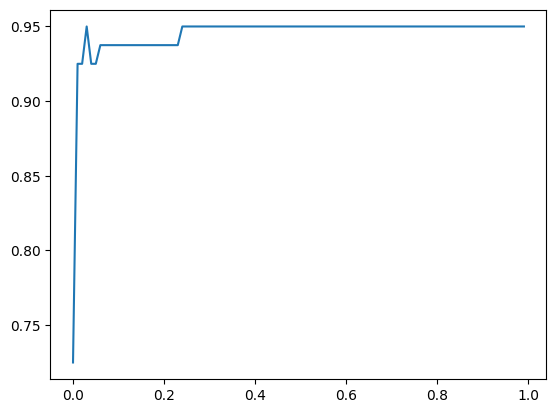

In [111]:
plt.plot(gammas, scores)

Gamma can be anything above 0.4

## Polynomial Kernal

In [112]:
poly_classifier = SVC(kernel="poly")

In [113]:
poly_classifier.fit(x_train, y_train)

SVC(kernel='poly')

In [114]:
y_pred_poly = poly_classifier.predict(x_test)
y_pred_poly

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

### Confusion Matrix

In [115]:
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_poly

array([[57,  1],
       [ 7, 15]], dtype=int64)

In [116]:
print(f"Accuracy for Training (POLY) {poly_classifier.score(x_test, y_test)}")
print(f"Accuracy for Test Dataset (POLY) {poly_classifier.score(x_train, y_train)}")

Accuracy for Training (POLY) 0.9
Accuracy for Test Dataset (POLY) 0.83125


It is almost the same as LINEAR